# Introduction

### Data Loading and Exploration

Set Up

In [433]:
# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from collections import Counter
from scipy import stats
from scipy.stats import norm

In [434]:
# show all dataframe columns
pd.set_option('display.max_columns', None)
# set matplotlib global settings eg. figsize
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [435]:
#import data
original_df = pd.read_csv('../data/rm_system/my_data.csv')

In [436]:
#quick look into the data
original_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [437]:
#checking dimensions of data
original_df.shape

print(f'There are {original_df.shape[0]} rows and {original_df.shape[1]} columns in the dataset')

There are 119390 rows and 32 columns in the dataset


**Column Description Table**
| **Column**                     | **Description**                                                                                                                                                                                                                                                                                                                                                                                                                   |
|--------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| hotel                          |                                                                                                                                                                                                H1 = Resort Hotel or H2 = City Hotel                                                                                                                                                                                               |
| is_canceled                    |                                                                                                                                                                                    Value indicating if the booking was canceled (1) or not (0)                                                                                                                                                                                    |
| lead_time                      |                                                                                                                                                              Number of days that elapsed between the entering date of the   booking into the PMS and the arrival date                                                                                                                                                             |
| arrival_date_year              |                                                                                                                                                                                                        Year of arrival date                                                                                                                                                                                                       |
| arrival_date_month             |                                                                                                                                                                                                          Month   of arrival date                                                                                                                                                                                                  |
| arrival_date_week_number       |                                                                                                                                                                                                Week number of year for arrival date                                                                                                                                                                                               |
| arrival_date_day_of_month      |                                                                                                                                                                                                        Day of arrival date                                                                                                                                                                                                        |
| stays_in_weekend_nights        |                                                                                                                                                                  Number of weekend nights (Saturday or Sunday) the guest stayed   or booked to stay at the hotel                                                                                                                                                                  |
| stays_in_week_nights           |                                                                                                                                                                     Number of week nights (Monday to Friday) the guest stayed or   booked to stay at the hotel                                                                                                                                                                    |
| adults                         |                                                                                                                                                                                                          Number of adults                                                                                                                                                                                                         |
| children                       |                                                                                                                                                                                                         Number of children                                                                                                                                                                                                        |
| babies                         |                                                                                                                                                                                                          Number of babies                                                                                                                                                                                                         |
| meal                           |                                                                                  Type of meal booked. Categories are presented in standard   hospitality meal packages: Undefined/SC – no meal package; BB – Bed &   Breakfast; HB – Half board (breakfast and one other meal – usually dinner);   FB – Full board (breakfast, lunch and dinner)                                                                                  |
| country                        |                                                                                                                                                                           Country of origin. Categories are represented in the ISO   3155–3:2013 format                                                                                                                                                                           |
| market_segment                 |                                                                                                                                                          Market segment designation. In categories, the term “TA” means   “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                         |
| distribution_channel           |                                                                                                                                                                   Booking   distribution channel. The term “TA” means “Travel Agents” and “TO” means   “Tour Operators”                                                                                                                                                           |
| is_repeated_guest              |                                                                                                                                                                          Value indicating if the booking name was from a repeated guest   (1) or not (0)                                                                                                                                                                          |
| previous_cancellations         |                                                                                                                                                                   Number of previous bookings that were cancelled by the   customer prior to the current booking                                                                                                                                                                  |
| previous_bookings_not_canceled |                                                                                                                                                                      Number of previous bookings not cancelled by the customer   prior to the current booking                                                                                                                                                                     |
| reserved_room_type             |                                                                                                                                                                   Code of room type reserved. Code is presented instead of   designation for anonymity reasons.                                                                                                                                                                   |
| assigned_room_type             |                                                                              Code for the type of room assigned to the booking. Sometimes   the assigned room type differs from the reserved room type due to hotel   operation reasons (e.g. overbooking) or by customer request. Code is   presented instead of designation for anonymity reasons.                                                                              |
| booking_changes                |                                                                                                                                        Number of changes/amendments made to the booking from the   moment the booking was entered on the PMS until the moment of check-in or   cancellation                                                                                                                                       |
| deposit_type                   |                                                            Indication on if the customer made a deposit to guarantee the   booking. This variable can assume three categories: No Deposit – no deposit   was made; Non Refund – a deposit was made in the value of the total stay   cost; Refundable – a deposit was made with a value under the total cost of   stay.                                                            |
| agent                          |                                                                                                                                                                                       ID of the   travel agency that made the booking                                                                                                                                                                                             |
| company                        |                                                                                                                                       ID of the company/entity that made the booking or responsible   for paying the booking. ID is presented instead of designation for anonymity   reasons                                                                                                                                      |
| days_in_waiting_list           |                                                                                                                                                                    Number of days the booking was in the waiting list before it   was confirmed to the customer                                                                                                                                                                   |
| customer_type                  | Type of booking, assuming one of four categories: Contract -   when the booking has an allotment or other type of contract associated to it;   Group – when the booking is associated to a group; Transient – when the   booking is not part of a group or contract, and is not associated to other   transient booking; Transient-party – when the booking is transient, but is   associated to at least other transient booking |
| adr                            |                                                                                                                                                       Average Daily Rate as defined by dividing the sum of all   lodging transactions by the total number of staying nights                                                                                                                                                       |
| required_car_parking_spaces    |                                                                                                                                                                                       Number of car parking spaces required by the customer                                                                                                                                                                                       |
| total_of_special_requests      |                                                                                                                                                                          Number of special requests made by the customer (e.g. twin bed   or high floor)                                                                                                                                                                          |
| reservation_status             |                                                                                     Reservation last status, assuming one of three categories:   Canceled – booking was canceled by the customer; Check-Out – customer has   checked in but already departed; No-Show – customer did not check-in and did   inform the hotel of the reason why                                                                                    |
| reservation_status_date        |                                                                                                            Date at which the last status was set. This variable can be   used in conjunction with the ReservationStatus to understand when was the   booking canceled or when did the customer checked-out of the hotel                                                                                                           |

In [438]:
#Review datatypes and null values
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [439]:
#checking null values
original_df.isnull().sum().loc[lambda x: x>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

**Initial Look at Columns**

| **Time Dependent Columns**       | **Non Null Count** | **Null Values** | **Type** | **Preprocessing Step**                |
|----------------------------------|--------------------|-----------------|----------|----------------------------------------|
| arrival_date_year                | 119390             | 0               | int64    | combine into arrival_date              |
| arrival_date_month               | 119390             | 0               | object   | combine into arrival_date              |
| arrival_date_week_number         | 119390             | 0               | int64    | combine into arrival_date              |
| arrival_date_day_of_month        | 119390             | 0               | int64    | combine into arrival_date              |
| reservation_status_date          | 119390             | 0               | object   | convert to datetime                    |



| **Guest Details Columns**      | **Non Null Count** | **Null Values** | **Type** | **Preprocessing Step**                |
|--------------------------------|--------------------|-----------------|----------|----------------------------------------|
| adults                         | 119390             | 0               | int64    |                                        |
| children                       | 119386             | 4               | float64  | binarize, null = 0                     |
| babies                         | 119390             | 0               | int64    | binarize                               |
| country                        | 118902             | 488             | object   | drop - too many variables              |
| customer_type                  | 119390             | 0               | object   | dummy variables                        |
| is_repeated_guest              | 119390             | 0               | int64    |                                        |
| previous_cancellations         | 119390             | 0               | int64    |                                        |
| previous_bookings_not_canceled | 119390             | 0               | int64    |                                        |



| **Room Reservation Related Columns** | **Non Null Count** | **Null Values** | **Type** | **Preprocessing Step**                |
|--------------------------------------|--------------------|-----------------|----------|----------------------------------------|
| hotel                                | 119390             | 0               | object   | dummy variables                        |
| is_canceled                          | 119390             | 0               | int64    | Target Variable                        |
| lead_time                            | 119390             | 0               | int64    |                                        |
| stays_in_weekend_nights              | 119390             | 0               | int64    |                                        |
| stays_in_week_nights                 | 119390             | 0               | int64    |                                        |
| market_segment                       | 119390             | 0               | object   | dummy variables                        |
| distribution_channel                 | 119390             | 0               | object   | dummy variables                        |
| reserved_room_type                   | 119390             | 0               | object   | drop - too many variables              |
| booking_changes                      | 119390             | 0               | int64    | dummy variables                        |
| deposit_type                         | 119390             | 0               | object   | dummy variables                        |
| agent                                | 103050             | 16340           | float64  | binarize                               |
| company                              | 6797               | 112593          | float64  | binarize                               |
| days_in_waiting_list                 | 119390             | 0               | int64    |                                        |
| adr                                  | 119390             | 0               | float64  |                                        |
| reservation_status                   | 119390             | 0               | object   | dummy variables                        |
| assigned_room_type                   | 119390             | 0               | object   | drop - too many variables              |



| **Reservation Misc Columns** | **Non Null Count** | **Null Values** | **Type** | **Preprocessing Step**                |
|------------------------------|--------------------|-----------------|----------|----------------------------------------|
| meal                         | 119390             | 0               | object   | dummy variables                        |
| required_car_parking_spaces  | 119390             | 0               | int64    |                                        |
| total_of_special_requests    | 119390             | 0               | int64    |                                        |


In [440]:
#Creating copy of original DF before initial cleaning
init_clean_df = original_df.copy()

In [441]:
#checking duplicates
init_clean_df.duplicated().sum()

31994

Identified 31,994 duplicated rows

In [442]:
#Looking into duplicates
init_clean_df[init_clean_df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04


Keeping the duplicate rows for a guests made multiple reservations for multiple rooms for the same arrival date.

### General Cleaning

In [443]:
#Create lists for each subset of columns

time_dependent_cols = [
    "arrival_date_year",
    "arrival_date_month",
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "reservation_status_date"]

guest_details_cols = [
    "adults",
    "children",
    "babies",
    "country",
    "customer_type",
    "is_repeated_guest",
    "previous_cancellations",
    "previous_bookings_not_canceled"]

room_res_cols = [
    "hotel",
    "is_canceled",
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "market_segment",
    "distribution_channel",
    "reserved_room_type",
    "booking_changes",
    "deposit_type",
    "agent",
    "company",
    "days_in_waiting_list",
    "adr",
    "reservation_status",
    "assigned_room_type"]

misc_res_cols = [
    "meal",
    "required_car_parking_spaces",
    "total_of_special_requests"]

In [444]:
#Sanity check on subsets
#init_clean_df[time_dependent_cols]

#init_clean_df[guest_details_cols]

init_clean_df[room_res_cols]

#init_clean_df[misc_res_cols]

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,reservation_status,assigned_room_type
0,Resort Hotel,0,342,0,0,Direct,Direct,C,3,No Deposit,NaN,NaN,0,0.00,Check-Out,C
1,Resort Hotel,0,737,0,0,Direct,Direct,C,4,No Deposit,NaN,NaN,0,0.00,Check-Out,C
2,Resort Hotel,0,7,0,1,Direct,Direct,A,0,No Deposit,NaN,NaN,0,75.00,Check-Out,C
3,Resort Hotel,0,13,0,1,Corporate,Corporate,A,0,No Deposit,304.0,NaN,0,75.00,Check-Out,A
4,Resort Hotel,0,14,0,2,Online TA,TA/TO,A,0,No Deposit,240.0,NaN,0,98.00,Check-Out,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,Offline TA/TO,TA/TO,A,0,No Deposit,394.0,NaN,0,96.14,Check-Out,A
119386,City Hotel,0,102,2,5,Online TA,TA/TO,E,0,No Deposit,9.0,NaN,0,225.43,Check-Out,E
119387,City Hotel,0,34,2,5,Online TA,TA/TO,D,0,No Deposit,9.0,NaN,0,157.71,Check-Out,D
119388,City Hotel,0,109,2,5,Online TA,TA/TO,A,0,No Deposit,89.0,NaN,0,104.40,Check-Out,A


In [445]:
#sanity check of new dataframes
#time_dependent_df.info()
#guest_details_df.info()
#room_res_df.info()
#misc_res_df.info()

### Time Dependent Columns

#### Cleaning

In [446]:
init_clean_df[time_dependent_cols]

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reservation_status_date
0,2015,July,27,1,2015-07-01
1,2015,July,27,1,2015-07-01
2,2015,July,27,1,2015-07-02
3,2015,July,27,1,2015-07-02
4,2015,July,27,1,2015-07-03
...,...,...,...,...,...
119385,2017,August,35,30,2017-09-06
119386,2017,August,35,31,2017-09-07
119387,2017,August,35,31,2017-09-07
119388,2017,August,35,31,2017-09-07


In [447]:
#convert reservation status date to datetime
init_clean_df['reservation_status_date'] = pd.to_datetime(init_clean_df['reservation_status_date'])

In [448]:
#Convert arrival_date_month to integers
#Create a dictionary to map month names to integers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12}

#Use mapping to convert arrival_date_month to integer
init_clean_df['arrival_date_month'] = init_clean_df['arrival_date_month'].map(month_mapping)

In [449]:
#Create Arrival Date column using by combining `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month`

#rename columns
init_clean_df.rename(columns={'arrival_date_year':'year', 'arrival_date_month':'month', 'arrival_date_day_of_month':'day'},inplace=True)

init_clean_df['arrival_date']= pd.to_datetime(init_clean_df[['year','month','day']])

In [450]:
#dropping year, month, and day of month columns
init_clean_df.drop(columns=['year','month','day'],inplace=True)

In [451]:
#update time dependent cols
time_dependent_cols_cleaned = [
    "arrival_date",
    "arrival_date_week_number",
    "reservation_status_date"]

In [452]:
init_clean_df[time_dependent_cols_cleaned]

,arrival_date,arrival_date_week_number,reservation_status_date
0,2015-07-01,27,2015-07-01
1,2015-07-01,27,2015-07-01
2,2015-07-01,27,2015-07-02
3,2015-07-01,27,2015-07-02
4,2015-07-01,27,2015-07-03
...,...,...,...
119385,2017-08-30,35,2017-09-06
119386,2017-08-31,35,2017-09-07
119387,2017-08-31,35,2017-09-07
119388,2017-08-31,35,2017-09-07


### Guest Details Columns

**cleaning**

In [453]:
init_clean_df[guest_details_cols].isnull().sum().loc[lambda x: x>0]

children      4
country     488
dtype: int64

In [454]:
init_clean_df[guest_details_cols].nunique()

adults                             14
children                            5
babies                              5
country                           177
customer_type                       4
is_repeated_guest                   2
previous_cancellations             15
previous_bookings_not_canceled     73
dtype: int64

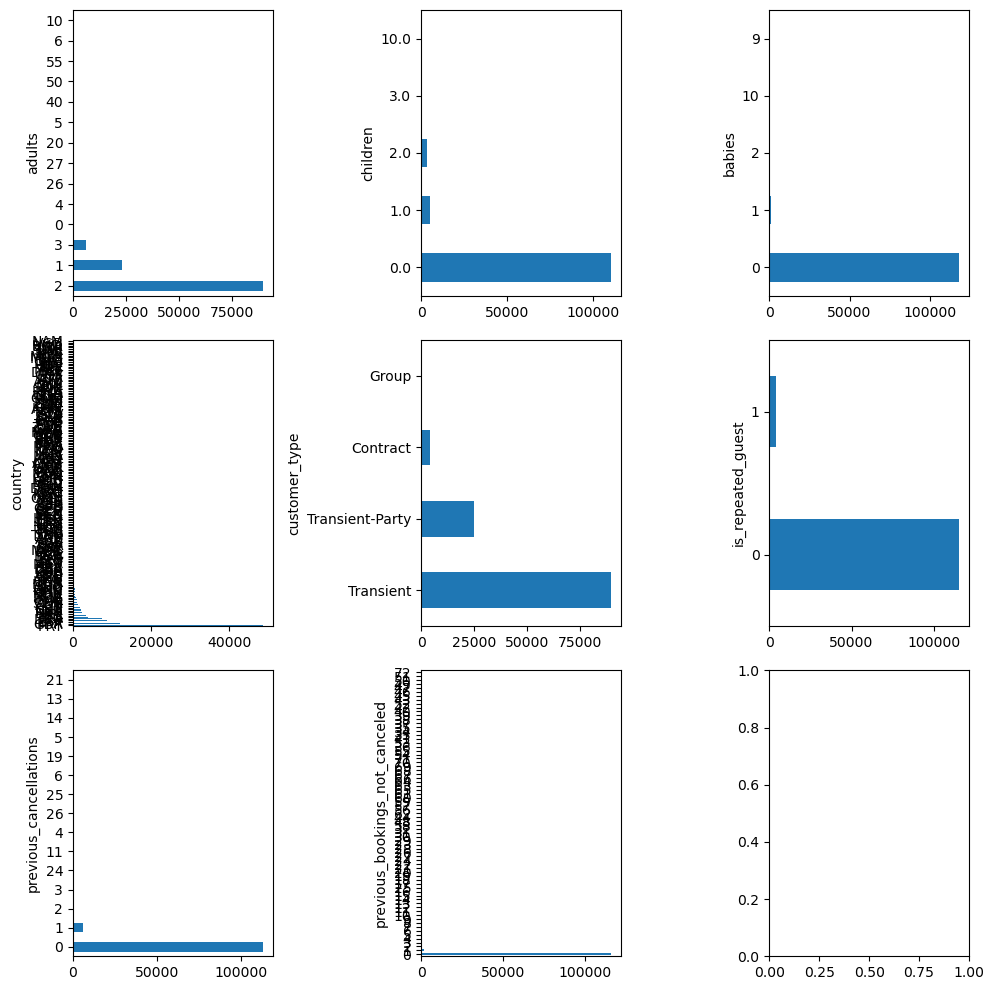

In [455]:
#Creating a value_count plot for each Guest Detail Column

#Specify subplot dimensions
nrows=3
ncols=3

plt.subplots(nrows, ncols, figsize=(10,10))

for i, col in enumerate(init_clean_df[guest_details_cols]):
    plt.subplot(nrows, ncols, i+1)
    init_clean_df[col].value_counts().plot(kind='barh')

plt.tight_layout()
plt.show()

Action Items for Guest Detail Columns:
1. Drop `country` column because there are too many columns to create dummy variables.
2. Binarize `children` and `babies` columns. Reservations are usually based on the number of `adults` in the room.
3. Create dummy variables for `customer_type` 
4. Drop `Group` as the reference column

In [456]:
#Drop Country column
init_clean_df.drop(columns='country', inplace=True)
guest_details_cols.remove('country')

In [457]:
#Binarize children and babies columns
init_clean_df['children'] = init_clean_df['children'].where(init_clean_df['children'] <=1 , 1)

init_clean_df['babies'] = init_clean_df['babies'].where(init_clean_df['babies'] <=1 , 1)

In [458]:
#Create dummy variables for guest detail columns
guest_dummy_df = pd.get_dummies(init_clean_df[guest_details_cols])
guest_dummy_df

,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,2,0.0,0,0,0,0,False,False,True,False
1,2,0.0,0,0,0,0,False,False,True,False
2,1,0.0,0,0,0,0,False,False,True,False
3,1,0.0,0,0,0,0,False,False,True,False
4,2,0.0,0,0,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
119385,2,0.0,0,0,0,0,False,False,True,False
119386,3,0.0,0,0,0,0,False,False,True,False
119387,2,0.0,0,0,0,0,False,False,True,False
119388,2,0.0,0,0,0,0,False,False,True,False


In [ ]:
#Drop reference column customer type Group
guest_dummy_df.drop(columns='customer_type_Group', inplace=True)

In [472]:
#Print guest dummy df
guest_dummy_df.sample()

,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,customer_type_Contract,customer_type_Transient,customer_type_Transient-Party
85657,2,0.0,0,0,0,0,False,True,False


***

### Misc Reservation Columns

In [459]:
init_clean_df[misc_res_cols]

,meal,required_car_parking_spaces,total_of_special_requests
0,BB,0,0
1,BB,0,0
2,BB,0,0
3,BB,0,0
4,BB,0,1
...,...,...,...
119385,BB,0,0
119386,BB,0,2
119387,BB,0,4
119388,BB,0,0


In [460]:
init_clean_df[misc_res_cols].isnull().sum().loc[lambda x: x>0]

Series([], dtype: int64)

In [461]:
init_clean_df[misc_res_cols].nunique()

meal                           5
required_car_parking_spaces    5
total_of_special_requests      6
dtype: int64

Action Items for Misc Reservation Columns:
1. Binarize `required_car_parking_spaces` and `meal` for now instead of dropping to see if there is any correlation to our target variables.
2. Create dummy variables for `customer_type`

### Room Reservation Columns

In [462]:
init_clean_df[room_res_cols]

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,reservation_status,assigned_room_type
0,Resort Hotel,0,342,0,0,Direct,Direct,C,3,No Deposit,NaN,NaN,0,0.00,Check-Out,C
1,Resort Hotel,0,737,0,0,Direct,Direct,C,4,No Deposit,NaN,NaN,0,0.00,Check-Out,C
2,Resort Hotel,0,7,0,1,Direct,Direct,A,0,No Deposit,NaN,NaN,0,75.00,Check-Out,C
3,Resort Hotel,0,13,0,1,Corporate,Corporate,A,0,No Deposit,304.0,NaN,0,75.00,Check-Out,A
4,Resort Hotel,0,14,0,2,Online TA,TA/TO,A,0,No Deposit,240.0,NaN,0,98.00,Check-Out,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,Offline TA/TO,TA/TO,A,0,No Deposit,394.0,NaN,0,96.14,Check-Out,A
119386,City Hotel,0,102,2,5,Online TA,TA/TO,E,0,No Deposit,9.0,NaN,0,225.43,Check-Out,E
119387,City Hotel,0,34,2,5,Online TA,TA/TO,D,0,No Deposit,9.0,NaN,0,157.71,Check-Out,D
119388,City Hotel,0,109,2,5,Online TA,TA/TO,A,0,No Deposit,89.0,NaN,0,104.40,Check-Out,A


In [463]:
init_clean_df[room_res_cols].isnull().sum().loc[lambda x: x>0]

agent       16340
company    112593
dtype: int64

In [464]:
init_clean_df[room_res_cols].nunique()

hotel                         2
is_canceled                   2
lead_time                   479
stays_in_weekend_nights      17
stays_in_week_nights         35
market_segment                8
distribution_channel          5
reserved_room_type           10
booking_changes              21
deposit_type                  3
agent                       333
company                     352
days_in_waiting_list        128
adr                        8879
reservation_status            3
assigned_room_type           12
dtype: int64

In [465]:
for col in init_clean_df[room_res_cols]:
    print(f"Column: {col}")
    print(init_clean_df[col].value_counts())
    print("\n")

Column: hotel
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64


Column: is_canceled
is_canceled
0    75166
1    44224
Name: count, dtype: int64


Column: lead_time
lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64


Column: stays_in_weekend_nights
stays_in_weekend_nights
0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: count, dtype: int64


Column: stays_in_week_nights
stays_in_week_nights
2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5

Action Items for Room Reservation Columns:
1. Impute nulls with 0 and Binarize `agent` and `company`columns.
2. Drop `reserved_room_type` and `assigned_room_type` because they would create too many dummy variables if we kept them.
3. Create dummy variables for `hotel`, `market_segment`, `distribution_channel`, `deposit_type`, `reservation_status`

In [466]:
#1. Impute nulls to 0 and Binarize agent and company. Yes = 1, No = 0
init_clean_df['agent'] = init_clean_df['agent'].fillna(0).clip(
    upper=1) #convert any value above 1 to be 1

init_clean_df['company'] = init_clean_df['company'].fillna(0).clip(upper=1)

In [467]:
#Sanity Check for agent column
init_clean_df['agent'].value_counts()

agent
1.0    103050
0.0     16340
Name: count, dtype: int64

In [468]:
#2 drop reserved room type and assigned room types
init_clean_df.drop(columns=['reserved_room_type','assigned_room_type'], inplace=True)

#Remove columns from room reservation columns list
room_res_cols.remove('reserved_room_type')
room_res_cols.remove('assigned_room_type')

In [469]:
init_clean_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [375]:
#3. Create dummy variables for market
room_res_dummys = pd.get_dummies(init_clean_df[room_res_cols])

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,booking_changes,agent,company,days_in_waiting_list,adr,hotel_City Hotel,hotel_Resort Hotel,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,0,0,3,0.0,0.0,0,0.00,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,0,737,0,0,4,0.0,0.0,0,0.00,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,0,7,0,1,0,0.0,0.0,0,75.00,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,0,13,0,1,0,1.0,0.0,0,75.00,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
4,0,14,0,2,0,1.0,0.0,0,98.00,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,5,0,1.0,0.0,0,96.14,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False
119386,0,102,2,5,0,1.0,0.0,0,225.43,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False
119387,0,34,2,5,0,1.0,0.0,0,157.71,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False
119388,0,109,2,5,0,1.0,0.0,0,104.40,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False


#### EDA

In [ ]:
# GOal: df where each row is a date, and the value is the total bookings 
#df2-> each row is a date and the value is total cancelations 


# --? Visualize as a line plot

***
# Preprocessing
## Identify what columns can be quickly addressed
- `children` float -> int
- `arrival_date_month` object -> datetime month
- `country` impute nulls with most common country

In [ ]:
# checking how many nulls in children column
init_clean_df['children'].isna().sum()

In [ ]:
#looking at which rows had null children values
init_clean_df[init_clean_df['children'].isna()]

Nulls in the `children` column can be imputed with 0, if the reservations were blank then we can assume they were 0.

In [ ]:
# fill children null values to 0
init_clean_df['children'] = init_clean_df['children'].fillna(0)

In [ ]:
#sanity check
init_clean_df['children'].isna().sum()

In [ ]:
# Convert children column to int
init_clean_df['children']= init_clean_df['children'].astype(int)

In [ ]:
#sanity check
init_clean_df.info()

In [ ]:
#Convert arrival_date_month to integers
#Create a dictionary to map month names to integers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12}

#Use mapping to convert arrival_date_month to integer
init_clean_df['arrival_date_month'] = init_clean_df['arrival_date_month'].map(month_mapping)

In [ ]:
#Sanity check
init_clean_df['arrival_date_month'].value_counts()

In [ ]:
#impute country nulls based on hotel column
init_clean_df['country'].value_counts()

The value_counts above shows that this is not the country of the hotel, rather it is the country of origin of the guest. Will impute with the mode of the country

In [ ]:
#identify the most frequent country
init_clean_df['country'].mode()[0]


In [ ]:
#impute nulls with PRT
init_clean_df['country'] = init_clean_df['country'].fillna(init_clean_df['country'].mode()[0])

## Quickly addressed columns checkpoint
- (COMPLETE) `children` float -> int 
- (COMPLETE)`arrival_date_month` object -> integer

- (COMPLETE)`country` impute nulls with the mode of country (PRT)

In [ ]:
init_clean_df.describe()

## Identifying Suspicious Values
**Suspicious Values**
- Max `adults` is 55 - possible data entry error?
- Max `children` is 10 - possible data entry error?
- Max `babies` is 10 - possible data entry error
- Max `stays_in_weekend_nights` is 19. With only 2 night per weekend, that means this guest stayed for 9.5 weeks, equating to almost a 70night stay
- Max `previous_cancellations` is 26. Possible the guest booked and cancelled a lot/potentially a corporate traveller needing to change reservations frequently? Plausible for city hotel, not as likely for resort hotel..
- Min `adr` is -6.38. ADR cannot be negative. For each reservation sold, they are provided a rate.  Comp rooms are $0 and no situation would a guest be paid to stay in a room...

- `company` and `agent` should not be a float. Convert to either INT or categorical as dummy variables depending on how many unique values appear.

Looking into Adults column. Dataset source keeps the hotel locations anoymous for privacy reasons.  Only identifier is that these two properties are in Portugal.

In [ ]:
#identifying the unique values counts for adults
init_clean_df['adults'].value_counts()

In [ ]:
#Identifying what hotel these large length of stays are in 
init_clean_df[init_clean_df['adults'] > 7]

The above results when looking at only hotels where the number of adults exceed 7, indicates that these are group blocks (mostly cancelled), but that they are not assigned to a single room.  Group blocks can be placed and can exceed the capacity of a single room.  FYI the largest room in the world can only accommodate up to 10 guests. <br>
<br>
This observation may also be applied to the suspicious values for `babies` and `children`.

In [ ]:
#checking babies
init_clean_df[init_clean_df['babies'] > 5]

In [ ]:
#Imputing the 2 values to be 0 due to likelihood of being a data entry error
init_clean_df[init_clean_df['babies'] > 5] = 0

In [ ]:
#sanity check that anomalies were removed 
init_clean_df['babies'].value_counts()

In [ ]:
#checking children
init_clean_df[init_clean_df['children'] > 5]

In [ ]:
#imputing value to 0
init_clean_df[init_clean_df['children'] > 5] = 0

In [ ]:
#sanity check
init_clean_df['children'].value_counts()

**Suspicious Values Update**
- (Complete) Max `adults` is 55 - valid due to group blocks. however leads me to pivot to adjusting my target to strictly transient demand.
- (Complete) Max `children` is 10 - imputed with 0
- (Complete) Max `babies` is 10 - imputed with 1 or 0
- (Keep As Is) Max `stays_in_weekend_nights` is 19. With only 2 night per weekend, that means this guest stayed for 9.5 weeks, equating to almost a 70night stay
- Max `previous_cancellations` is 26. Possible the guest booked and cancelled a lot/potentially a corporate traveller needing to change reservations frequently? Plausible for city hotel, not as likely for resort hotel..
- Min `adr` is -6.38. ADR cannot be negative. For each reservation sold, they are provided a rate.  Comp rooms are $0 and no situation would a guest be paid to stay in a room...

- `company` and `agent` should not be a float. Convert to either INT or categorical as dummy variables depending on how many unique values appear.

In [ ]:
#imputing any negative ADR to 0
init_clean_df[init_clean_df['adr'] < 0] = 0

In [ ]:
#sanity check, min is now 0 and not negative
init_clean_df['adr'].describe()

In [ ]:
#checking value counts of stays in weekend nights - looks like there are some longer LOS's in this dataset
init_clean_df['stays_in_weekend_nights'].value_counts()

In [ ]:
#checking value counts of previous cancellations - looks like it is normal in this dataset
init_clean_df['previous_cancellations'].value_counts()

In [ ]:
#Impute Company and Agent nulls with 0
init_clean_df[['agent','company']] = init_clean_df[['agent','company']].fillna(0)

In [ ]:
#Change company and agent to INT
init_clean_df['agent']= init_clean_df['agent'].astype(int)

init_clean_df['company']= init_clean_df['company'].astype(int)

In [ ]:
#Sanity check - Company and Agent as INT
init_clean_df.info()

## Suspicious Values Complete
- (Complete) Max `adults` is 55 - valid due to group blocks. however leads me to pivot to adjusting my target to strictly transient demand.
- (Complete) Max `children` is 10 - imputed with 0
- (Complete) Max `babies` is 10 - imputed with 1 or 0
- (Keep As Is) Max `stays_in_weekend_nights` is 19. Value counts show long stays are not impossible. Many 10+ weekend_nights
- (Keep As Is) Max `previous_cancellations` is 26. Value counts show that this is normal in this dataset.
- (Complete) Min `adr` is -6.38. Imputed negative adr to 0.

- (Complete)`company` and `agent` Imputed nulls with 0, converted to INT datatype


In [ ]:
#Loop of value counts for each column
for col in init_clean_df:
    print(f"Column: {col}")
    print(init_clean_df[col].value_counts())
    print("\n")


In [ ]:
#identifying rows that have 0 in the hotel column. Looks to apply to all rows
init_clean_df[init_clean_df['hotel'] == 0]

In [ ]:
#dropping the rows with 0's 
init_clean_df = init_clean_df[init_clean_df['hotel'] !=0]

In [ ]:
#Sanity check: Rerunning Loop of value counts for each column
for col in init_clean_df:
    print(f"Column: {col}")
    print(init_clean_df[col].value_counts())
    print("\n")


In [ ]:
#create variable for only categoric columns
df_cat = init_clean_df.select_dtypes(include='object').copy()

#create variable for only numeric columns
df_num = init_clean_df.select_dtypes(include=['int','float']).copy()

In [ ]:
#Creating a value_count plot for each categorical variable distributions

#Specify subplot dimensions
nrows=4
ncols=3

plt.subplots(nrows, ncols, figsize=(10,10))

for i, col in enumerate(df_cat):
    plt.subplot(nrows, ncols, i+1)
    df_cat[col].value_counts().plot(kind='barh')

plt.tight_layout()
plt.show()

## Action Plan
**Identify what categories require Binary Encoding, Ordinal Encoding, or Dummy Variables**

Binary Encoding
- `meal` Yes = 1, Undefined/No = 0
- `hotel` City Hotel = 1, Resort Hotel = 0
- `children` Yes = 1, No = 0
- `babies` Yes = 1, No = 0
- `agent` Yes = 1, No = 0



Ordinal Encoding
- N/A

Dummy Variable
- `Market_Segment` - needed to see if there are certain MS’s that have more demand
- `Distribution_Channel` - what channels provide the most demand?
- `reserved_room_type` <- do certain room types have more demand?
- `assigned_room_type`
- `deposit_type`
- `customer_type` <- eliminate contract and group rows?
- `reservation_status`

Converting `meal` to binary:

In [ ]:
# To turn meal column into binary:
meal_mapping = {'BB': 1, 'HB': 1, 'SC': 1, 'FB' : 1, 'Undefined': 0}

init_clean_df['meal'] = init_clean_df['meal'].map(meal_mapping)

In [ ]:
#sanity check
init_clean_df['meal'].value_counts()

Converting `hotel` to binary: City Hotel = 1, Resort Hotel = 0

In [ ]:
#Convert hotel to binary:
hotel_mapping = {'City Hotel' : 1, 'Resort Hotel' :0}
init_clean_df['hotel'] = init_clean_df['hotel'].map(hotel_mapping)

Converting `children`, `babies`, and `agent` columns to binary: Any values greater than 0 = 1

In [ ]:
#Convert children, babies, agent columns to binary Y = 1, N = 0
init_clean_df['children'] = init_clean_df['children'].where(init_clean_df['children'] <=1 , 1)

init_clean_df['babies'] = init_clean_df['babies'].where(init_clean_df['babies'] <=1 , 1)

init_clean_df['agent'] = init_clean_df['agent'].where(init_clean_df['agent'] <=1 , 1)

In [ ]:
#sanity check of hotel, babies, children, and agent columns
print(init_clean_df['hotel'].value_counts())
print(init_clean_df['babies'].value_counts())
print(init_clean_df['children'].value_counts())
print(init_clean_df['agent'].value_counts())


In [ ]:
#Create dummy variables
pd.get_dummies(init_clean_df)

In [ ]:
#drop country since it is too granular
init_clean_df.drop(columns='country', inplace=True)

In [ ]:
#check reservation status date
init_clean_df['reservation_status_date'].value_counts()

In [ ]:
#convert reservation status date to datetime
init_clean_df['reservation_status_date'] = pd.to_datetime(init_clean_df['reservation_status_date'])

In [ ]:
#Create dummy variables
init_clean_df = pd.get_dummies(init_clean_df)
init_clean_df

In [ ]:
#Delete Reference Columns based on the initial categorical distribution plots above: 
reference_cols = ['market_segment_Aviation','distribution_channel_GDS','reserved_room_type_L','assigned_room_type_L','deposit_type_Refundable','customer_type_Group','reservation_status_No-Show']

init_clean_df.drop(columns=reference_cols, inplace=True)

In [ ]:
#Create Arrival Date column using by combining `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month`

#rename columns
init_clean_df.rename(columns={'arrival_date_year':'year', 'arrival_date_month':'month', 'arrival_date_day_of_month':'day'},inplace=True)

init_clean_df['arrival_date']= pd.to_datetime(init_clean_df[['year','month','day']])

#dropping year, month, and day of month columns
init_clean_df.drop(columns=['year','month','day'],inplace=True)

init_clean_df.head(5)

## Create feature column demand. 
Demand is equal to the total number of reservations booked for a specific arrival date.

In [ ]:
#value counts of arrival_date
day_demand_counts = init_clean_df['arrival_date'].value_counts()

In [ ]:
init_clean_df['day_demand'] = init_clean_df['arrival_date'].map(day_demand_counts)
init_clean_df['day_demand']

In [ ]:
hotel_df_cleaned = init_clean_df.copy()

In [ ]:
hotel_df_cleaned.head(10)



***

# Preliminary EDA

In [ ]:
hotel_df_cleaned.columns

In [ ]:
#Assigning independent variables to 
X = hotel_df_cleaned.drop('day_demand',axis=1)
y = hotel_df_cleaned['day_demand']

In [ ]:
#Create a dataframe out of X.corr()
corr_df = X.corr()

mask = np.triu(corr_df) #Find the top of the triangle

plt.figure(figsize=(20,20))

#Create heatmap
sns.heatmap(
    corr_df.round(2), #rounding
    vmax=1,#set max value to 1 because we want to bound the results
    vmin=-1, #set min value to -1 for the same reason
    cmap='coolwarm',
    annot=True, #put the points on the plot
    mask=mask #remove the top half

)
plt.title('Correlations between Independent Variables')
plt.show()

In [ ]:
X.corr()